# Vector Analysis

In [1]:
import geopandas

## Reading in a shapefile

In [2]:
# File path
cities = geopandas.read_file('/vsicurl/https://github.com/mhweber/Rspatialworkshop/raw/master/inst/extdata/cities.shp')
# Check input data
cities.head()

,AREA,PERIMETER,CITIES_,CITIES_ID,CITY,FLAG,geometry
0,0.0,0.0,1,1658,MULINO,0,POINT (776899.812 1272019.125)
1,0.0,0.0,2,1368,HAMMOND,0,POINT (439320.844 1638725.000)
2,0.0,0.0,3,1366,FORT STEVENS,0,POINT (435108.000 1641590.750)
3,0.0,0.0,4,1382,GLIFTON,0,POINT (560721.000 1638699.875)
4,0.0,0.0,5,1384,BRADWOOD,0,POINT (568325.812 1632800.000)


In [3]:
# object type is GeoDataFrame
type(cities)

geopandas.geodataframe.GeoDataFrame

## geopandas.GeoDataFrame is a subclass of pandas.Dataframe - all the pandas functinoality is available to use on it

In [4]:
type(cities['CITY'])

pandas.core.series.Series

In [5]:
cities['CITY'].str.lower()

0                 mulino
1                hammond
2           fort stevens
3                glifton
4               bradwood
             ...        
893            cornelius
894               harbor
895            marshland
896          lake oswego
897    twelvemile corner
Name: CITY, Length: 898, dtype: object

## Plus it has a special geometry column

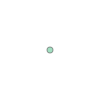

In [6]:
# Plus geometry column
cities.iloc[0]['geometry']

In [7]:
# Each value is a geometry object
type(cities.iloc[0]['geometry'])

shapely.geometry.point.Point

In [8]:
# With spatial attributes like x & y
cities.iloc[0]['geometry'].x, cities.iloc[0]['geometry'].y

(776899.8125, 1272019.125)

In [9]:
# Shapely geometry object has various spatial attributes/methods
dir(cities.iloc[0]['geometry'])

['__and__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__xor__',
 '_geom',
 '_geom_prepared',
 '_ndim',
 '_repr_svg_',
 'almost_equals',
 'area',
 'boundary',
 'bounds',
 'buffer',
 'centroid',
 'contains',
 'contains_properly',
 'convex_hull',
 'coords',
 'covered_by',
 'covers',
 'crosses',
 'difference',
 'disjoint',
 'distance',
 'dwithin',
 'envelope',
 'equals',
 'equals_exact',
 'geom_type',
 'geometryType',
 'has_z',
 'hausdorff_distance',
 'interpolate',
 'intersection',
 'intersects',
 'is_closed',
 'is_empty',
 'is_ring',
 'is_simple',
 'is_valid',
 'length',
 'line_interpolate

## GeoDataFrame spatial methods

In [10]:
# Distance to point
cities['distance_mulino'] = cities.distance(cities.iloc[0]['geometry'])
cities['distance_mulino']

0      0.000000e+00
1      4.984303e+05
2      5.033933e+05
3      4.256619e+05
4      4.167325e+05
           ...     
893    1.607713e+05
894    1.239386e+06
895    3.710563e+05
896    7.702938e+04
897    1.108091e+05
Name: distance_mulino, Length: 898, dtype: float64

In [11]:
# Buffer
gdf_buff = cities.buffer(100)
gdf_buff

0      POLYGON ((776999.812 1272019.125, 776999.331 1...
1      POLYGON ((439420.844 1638725.000, 439420.362 1...
2      POLYGON ((435208.000 1641590.750, 435207.518 1...
3      POLYGON ((560821.000 1638699.875, 560820.518 1...
4      POLYGON ((568425.812 1632800.000, 568425.331 1...
                             ...                        
893    POLYGON ((656822.688 1378812.750, 656822.206 1...
894    POLYGON ((290049.125 132301.000, 290048.643 13...
895    POLYGON ((605256.125 1600936.875, 605255.643 1...
896    POLYGON ((756741.562 1346336.875, 756741.081 1...
897    POLYGON ((816662.000 1375486.875, 816661.518 1...
Length: 898, dtype: geometry

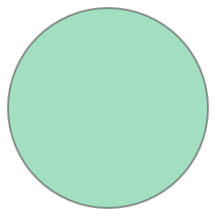

In [12]:
gdf_buff[0]

## Writing results to a shapefile

In [13]:
gdf_buff.to_file(r'C:\Users\jbousqui\Local_GIS\temp_test\OS_gdf_example.shp')

## Build Query for NLCD (this should all be deleted)

In [14]:
bbox = gdf_buff.total_bounds  #full set is too large
bbox = gdf_buff[0].buffer(1000).bounds

In [15]:
subset = ['X("{}","{}")'.format(bbox[0], bbox[2]),
          'Y("{}","{}")'.format(bbox[1], bbox[3])]
subset

['X("775801.017043795","777998.607956205")',
 'Y("1270920.3295437943","1273117.9204562057")']

In [16]:
query_crs = gdf_buff.crs.to_epsg()
query_crs

2992

In [17]:
year = 2021
dataset = "Tree_Canopy"
serviceName = f"nlcd_tcc_conus_{year}_v2021-4"
coverage = "mrlc_download__" + serviceName
landmass = "L48"
epsg_url = "http://www.opengis.net/def/crs/EPSG/0/"
out_crs = 5070

In [18]:
params = {"service": "WCS",
                  "version": "2.0.1",
                  "request": "GetCoverage",
                  "coverageid": coverage,
                  "subset": subset,
                  "SubsettingCRS": f'{epsg_url}{query_crs}',
                  "format": 'image/geotiff',
                  "OutputCRS": '{}{}'.format(epsg_url, out_crs),
                  }

In [19]:
url = f"https://www.mrlc.gov/geoserver/mrlc_download/{serviceName}/ows"

In [20]:
import os
import requests
TIMEOUT = 100

In [21]:
def get_url(url, data=None):
    """
    Standard get request from url

    Parameters
    ----------
    url : string
        url to send request to.
    data : dict, optional
        The payload of data to request. The default is None.

    Returns
    -------
    res : string or json
        Response, type depends on service and data.

    """
    if data:
        res = requests.get(url, data, timeout=TIMEOUT)
    else:
        res = requests.get(url, timeout=TIMEOUT)
    #TODO: watch out for res.url vs url (added back, possibly removed it once)
    assert res.ok, 'Problem with {}'.format(res.url)
    return res

In [22]:
res = get_url(url, params)

In [23]:
#f'L:\Public\jbousqui\Code\GitHub\Python_OpenSource_GIS\extdata\NLCD_{year}_{dataset}.tif'
out_file = os.path.join(r'L:\Public\jbousqui\Code\GitHub\Python_OpenSource_GIS\extdata', f'NLCD_{year}_{dataset}.tif')
out_file

'L:\\Public\\jbousqui\\Code\\GitHub\\Python_OpenSource_GIS\\extdata\\NLCD_2021_Tree_Canopy.tif'

In [24]:
with open(out_file, "wb") as f:
    f.write(res.content)